# Main Project

# Domain:  HR

<u>Problem Statement </u>

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 80% are considered) etc., employee gets promotion For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('Project-HR Analytics Employee Promotion.csv')
#displaying  top 5  rows of the dataset
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong>
    
```    
(1)This dataset contains  details of 54808 employess in a company provided by HR Department        
(2)There are 14 columns/features        
(3)9 of these columns are of numerical data type  datatype and remaining are of object data type.    
(4)There is no discrepancies in the datatypes of the corresponding columns. So any data convertion is not needed.    
(5)some numerical data type columns are of categorical type columns .    
(6)"is_promoted" is our target column.    
(7)Also there are some empty/NaN values present in the dataset in the columns of "education", "previous_year_rating". 
    
 ```   

    
</div>

In [5]:
#Summary Statistics
data.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [6]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<div class="alert alert-block alert-info"><b>Statistical Summary:</b><br>  <strong>
    
````
 
(1)About the promotion, Majority of the employees are not getting promotion in the company.only a small amount of 8.5% of the employees are getting promoted .
(2)So this dataset is not a balanced dataset.   
(3)There is not much variance(std wise) in values of most of numerical columns.
(3)Department-9 departments 
(4)Region- 34 unique regions
(5)gender-number of male employees are more compared to female employees
(6)Education- 3 categories 
(7)recruitment channel-3 channels
(8)no of trainings- ranges between 1 to 10 & average is 1 
(9)age: ranges from 20 to 60 & average is 35
(10)previous_year_rating: ranges between 1 to 5 & average is 3 
(11)length_of_service: There are employees who has been working for 37 years & average is 6
(12)avg_training_score: Average score in current training evaluations range between 39 to 99
 
````

    
</div>

# pycaret

In [7]:
# setting EmployeeNumber as index
data.set_index('employee_id', inplace=True)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# to check for duplicates & show the both duplicated entries with (keep=False)
employees = pd.DataFrame(data)
duplicates = employees.duplicated()
full_duplicates = employees[employees.duplicated(keep=False)] \
              .sort_values(by=['department','region','education','gender','recruitment_channel'])
full_duplicates.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1975,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,1,0,84,0
14744,Analytics,region_2,Bachelor's,m,other,1,27,3.0,3,1,0,84,0
61176,Analytics,region_2,NaN,m,other,1,29,NaN,1,0,0,85,0
63201,Analytics,region_2,NaN,m,other,1,29,NaN,1,0,0,85,0
60449,Analytics,region_22,Bachelor's,f,other,2,28,3.0,3,1,0,87,0
66164,Analytics,region_22,Bachelor's,f,other,2,28,3.0,3,1,0,87,0
46167,Analytics,region_22,Bachelor's,f,sourcing,1,27,NaN,1,1,0,87,0
71563,Analytics,region_22,Bachelor's,f,sourcing,1,27,NaN,1,1,0,87,0
50999,Analytics,region_22,Bachelor's,f,sourcing,1,28,3.0,2,0,0,84,0


In [9]:
# To check for  duplicate rows
data_dup=data[data.duplicated()]
data.duplicated().sum()

118

In [10]:
#Dropping duplicates rows by keeping the first occurrence 
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4062
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54690 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54690 non-null  object 
 1   region                54690 non-null  object 
 2   education             52292 non-null  object 
 3   gender                54690 non-null  object 
 4   recruitment_channel   54690 non-null  object 
 5   no_of_trainings       54690 non-null  int64  
 6   age                   54690 non-null  int64  
 7   previous_year_rating  50628 non-null  float64
 8   length_of_service     54690 non-null  int64  
 9   KPIs_met >80%         54690 non-null  int64  
 10  awards_won?           54690 non-null  int64  
 11  avg_training_score    54690 non-null  int64  
 12  is_promoted           54690 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.8+ MB


In [13]:
#categorical & numerical columns
df_obj_only = data.select_dtypes(include=np.object)
df_numerics_only = data.select_dtypes(include=np.number)

In [14]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
# Categorical features
cat_cols = ['department', 'education','gender', 
            'recruitment_channel','no_of_trainings','previous_year_rating',
            'KPIs_met >80%','awards_won?'  
             ]

In [16]:
# Display No of Unqiue Values and Actual Unique Values :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
        
display_unique(data)



No of Unique Values in department Column are : 9
Actual Unique Values in department Column are : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']

No of Unique Values in region Column are : 34
Actual Unique Values in region Column are : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']

No of Unique Values in education Column are : 3
Actual Unique Values in education Column are : ["Bachelor's" 'Below Secondary' "Master's & above" nan]

No of Unique Values in gender Column are : 2
Actual Unique Values in gender Column are : ['f' 'm']

No of Unique Values in recruitment_channel Column

## Exploratory Data Analysis

In [17]:
from scipy import stats
#Chi square test
for i in df_obj_only:

        contingency_table=pd.crosstab(data['is_promoted'],data[i])
        obs=contingency_table.values
        b=stats.chi2_contingency(contingency_table)
        exp=b[3]
        rows=len(contingency_table.iloc[0:2,0])
        col=len(contingency_table.iloc[0,0:2])
        ddof=(rows-1)*(col-1)
        alpha=0.05
        from scipy.stats import chi2
        chi_square=sum([(o-e)**2./e for o,e in zip(obs,exp)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        critical=chi2.ppf(q=1-alpha,df=ddof)
        pvalue=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        print(i,"-",pvalue<alpha)

department - True
region - False
education - True
gender - True
recruitment_channel - True


# Pre-processing

## Missing Value handling

In [18]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = round(data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(3)

,Total,%
previous_year_rating,4062,7.43
education,2398,4.38
department,0,0.00


<u> **null values in previous_year_rating**    

In [19]:
# creating a dataframe of rows w.r.t null values in previous_year_rating
prev_year_null=data[data['previous_year_rating'].isnull()]
prev_year_null.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [20]:
# checking null values in previous_year_rating w.r.t length of service
prev_year_null['length_of_service'].value_counts()

1    4062
Name: length_of_service, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong>  
    
```     
length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits  So they dont have the previous year rating.so going to repalce with 0 for the null values.
```    
</div>

In [21]:
# filling null values in previous_year_rating with "0"
data['previous_year_rating'].fillna(value=0,inplace=True)

In [22]:
#checking for null values again
data.isnull().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<u> **null values in education**    

In [23]:
# creating a dataframe of rows w.r.t null values in education
educ_emp_null=data[data['education'].isnull()]
educ_emp_null.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


In [24]:
#checking count of education category in each department 
data.groupby('department')['education'].value_counts()

department         education       
Analytics          Bachelor's           3968
                   Master's & above     1037
Finance            Bachelor's           1894
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1521
                   Master's & above      733
                   Below Secondary       127
Legal              Bachelor's            807
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7753
                   Master's & above     3165
                   Below Secondary       175
Procurement        Bachelor's           4387
                   Master's & above     2543
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11061
                   Master's & above     4163
Technology         

<div class="alert alert-block alert-info"><b>Insights:</b><br>  <strong>  
    
```     
After checking null values in education w.rt .other columns ,didnt find any observations regarding why there was missing values in education column .so going to repalce null values with mode value of education i.e "Bachelor's" (70% of employees in the company have bachelores degree).
```    
</div>

In [25]:
# filling null values in education using mode value
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [26]:
#checking for null values again
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Outlier Detection & Handling

In [27]:
#outlier columns
outlier_data = data[['no_of_trainings','age','length_of_service']]

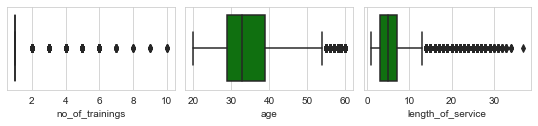

In [28]:
l = outlier_data.columns.values
#outlier Detection using box plot
plt.figure(figsize=(15,10))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)    
    sns.boxplot(df_numerics_only[l[i]],color='green',orient='v')
    plt.tight_layout()

In [29]:
#shape of dataframe before removing outlier removal
print("shape of dataframe before outlier removal",data.shape)

shape of dataframe before outlier removal (54690, 13)


<u>**Outlier handling in no_of_trainings**

In [30]:
from collections import Counter
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['no_of_trainings'],25,interpolation='midpoint')
Q2=np.percentile(data['no_of_trainings'],50,interpolation='midpoint')
Q3=np.percentile(data['no_of_trainings'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['no_of_trainings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values:\n",Counter(outlier))

Q1 1.0
Q2 1.0
Q3 1.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 0.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit 1.0
Upper Limit 1.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 10421
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values:
 Counter({2: 7983, 3: 1772, 4: 467, 5: 128, 6: 44, 7: 12, 8: 5, 9: 5, 10: 5})


In [31]:
#checking how many employers age morethan 54 have got promotion
no_of_trainings_promoted = data[(data['no_of_trainings']>=6) & (data['is_promoted']==1) ]
no_of_trainings_promoted['no_of_trainings'].value_counts()

6    2
Name: no_of_trainings, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that employees who had no_of_trainings upto 6 have chance of getting promotion ,but removing those outliers will affect the bias of the analysis. 
```   
    
(2)can remove outliers with employees who had no_of_trainings  more than 6,
    
```   
because from the data analysis we understood that  no employees got promoted who had training more  than 6
``` 
</div>

In [32]:
# here outlier values are lower than lower limit and upper than upper limit
low_lim=1
up_lim=6
outlier=[]
for x in data['no_of_trainings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

The count of outliers: 27
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({7: 12, 8: 5, 9: 5, 10: 5})


In [33]:
#to find index of outlier values
index=data['no_of_trainings'][(data['no_of_trainings']>up_lim)|(data['no_of_trainings']<low_lim)].index
print("count of index:",len(index))
#removing outliers
data.drop(index,inplace=True)

count of index: 27


<u>**Outlier handling in age**

In [34]:
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values  :\n",Counter(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
index=data['age'][(data['age']>up_lim)|(data['age']<low_lim)].index
print("count of index:",len(index))

Q1 29.0
Q2 33.0
Q3 39.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 10.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit 14.0
Upper Limit 54.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 1433
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values  :
 Counter({55: 293, 56: 264, 57: 238, 60: 216, 58: 213, 59: 209})
━━━━━━━━━━━━━━━━━━━━━━
count of index: 1433


In [35]:
#checking how many employers age morethan 54 have got promotion
age_promoted = data[(data['age']>=55) & (data['is_promoted']==1) ] 
age_promoted['age'].value_counts()

56    21
55    18
59    17
58    16
60    14
57     5
Name: age, dtype: int64

In [36]:
# filtering employees doesnt got promotion w.r.t age of more than 54 
age_filtered = data[(data['age']>=55) & (data['is_promoted']==0) ]  
# Print the new dataframe
age_filtered.shape

(1342, 13)

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that 91 employees got promoted who aged more than  54 ,but removing those outliers will  increase the bias of the analysis. 
```   
    
(2)can remove outliers 
```    
with employees who aged more than  54 & havent got promoted,there are 1342 such employees
```  
</div>

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that 91 employees got promoted who aged more than  54 ,so removing those outliers will  affect the analysis. 
```   
 
</div>

<u>**Outlier handling in length_of_service**

In [37]:
#defining quantiles,IQR,upper limit and lower limit with IQR values
Q1=np.percentile(data['length_of_service'],25,interpolation='midpoint')
Q2=np.percentile(data['length_of_service'],50,interpolation='midpoint')
Q3=np.percentile(data['length_of_service'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
print("━━━━━━━━━━━━━━━━━━━━━━")
IQR=Q3-Q1
print("IQR",IQR)
print("━━━━━━━━━━━━━━━━━━━━━━")
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
print("━━━━━━━━━━━━━━━━━━━━━━")
# here outlier values are lower than lower limit and upper than upper limit
outlier=[]
for x in data['length_of_service']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

Q1 3.0
Q2 5.0
Q3 7.0
━━━━━━━━━━━━━━━━━━━━━━
IQR 4.0
━━━━━━━━━━━━━━━━━━━━━━
Lower limit -3.0
Upper Limit 13.0
━━━━━━━━━━━━━━━━━━━━━━
The count of outliers: 3487
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({15: 593, 14: 549, 16: 547, 17: 431, 18: 392, 19: 329, 20: 128, 21: 78, 24: 70, 23: 65, 22: 61, 25: 51, 26: 41, 27: 36, 28: 30, 29: 30, 31: 20, 30: 12, 32: 10, 33: 9, 34: 4, 37: 1})


In [38]:
#checking how many employers who have length of service morethan 25 have got promotion
leng_service_promoted = data[(data['length_of_service']>=25) &       data['is_promoted'] == 1]
leng_service_promoted['length_of_service'].value_counts()

29    3
25    2
32    2
28    2
27    1
34    1
Name: length_of_service, dtype: int64

<div class="alert alert-block alert-info"><b>Insights:</b>  <strong>  
    
(1)not removing all the outliers ,for the following reason:    
```  
From data analysis we know that employees who had more length_of_service of 20 have less chance of getting promotion ,but removing those outliers will  affect the analysis. 
```   
    
(2)can remove outliers with employees who had length_of_service  more than 25,
    
```   
because from the data analysis we understood there are only  11 employees who got promoted with length_of_service more than 25 years,so removing outliers  of length_of_service rows with more than 25 years
``` 
</div>

In [39]:
# here outlier values are lower than lower limit and upper than upper limit
low_lim=0
up_lim=24
outlier=[]
for x in data['length_of_service']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers:', len(outlier))
print("━━━━━━━━━━━━━━━━━━━━━━")
print("count of outliers values :\n",Counter(outlier))

The count of outliers: 244
━━━━━━━━━━━━━━━━━━━━━━
count of outliers values :
 Counter({25: 51, 26: 41, 27: 36, 28: 30, 29: 30, 31: 20, 30: 12, 32: 10, 33: 9, 34: 4, 37: 1})


In [40]:
#to find index of outlier values
index=data['length_of_service'][(data['length_of_service']>up_lim)|(data['length_of_service']<low_lim)].index
print("count of index:",len(index))
#removing outliers
data.drop(index,inplace=True)

count of index: 244


In [41]:
#shape of dataframe after outlier removal
print("shape of dataframe after outlier removal",data.shape)

shape of dataframe after outlier removal (54419, 13)


#### Feature Reduction

**already made employee id as index**

#### Feature Engineering

<AxesSubplot:ylabel='region'>

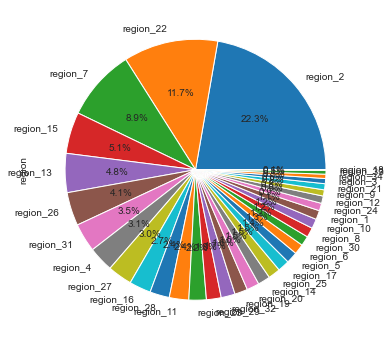

In [42]:
data["region"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0)

In [43]:
#So if there is only less than 4% of employees from a region ,labelling that regions as "others" 
Region_Dict = {}
for i,a in list(zip(data.region.value_counts().index.unique(),data.region.value_counts(1)*100)):
    if a <=4:
        Region_Dict[i] = "others"
    else:
        Region_Dict[i] = "" + str(i)


In [44]:
Region_Dict

{'region_2': 'region_2',
 'region_22': 'region_22',
 'region_7': 'region_7',
 'region_15': 'region_15',
 'region_13': 'region_13',
 'region_26': 'region_26',
 'region_31': 'others',
 'region_4': 'others',
 'region_27': 'others',
 'region_16': 'others',
 'region_28': 'others',
 'region_11': 'others',
 'region_23': 'others',
 'region_29': 'others',
 'region_32': 'others',
 'region_19': 'others',
 'region_20': 'others',
 'region_14': 'others',
 'region_25': 'others',
 'region_17': 'others',
 'region_5': 'others',
 'region_6': 'others',
 'region_30': 'others',
 'region_8': 'others',
 'region_10': 'others',
 'region_1': 'others',
 'region_24': 'others',
 'region_12': 'others',
 'region_9': 'others',
 'region_21': 'others',
 'region_3': 'others',
 'region_34': 'others',
 'region_33': 'others',
 'region_18': 'others'}

In [45]:
data.region= data.region.map(Region_Dict)

In [46]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,others,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,others,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,others,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,others,Master's & above,f,other,1,37,2.0,6,0,0,56,0
13918,Analytics,others,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [47]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,others,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,others,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,others,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,others,Master's & above,f,other,1,37,2.0,6,0,0,56,0
13918,Analytics,others,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


#### Encoding

In [48]:
#label encoding for education
data.education.replace({'Below Secondary': 0, "Bachelor's": 1, "Master's & above": 2}, inplace=True)

#### one hot encoding



**label encoding is not good for categorical values as  model will give weightage to the highest number in the feature than considering the category ,so here we are using one hot encoding**



In [49]:
#using one hot encoding for gender
data=pd.get_dummies(data)
data

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
65141,1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
74592,2,1,37,2.0,6,0,0,56,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
13918,1,1,27,5.0,3,1,0,79,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [50]:
df_obj_only1 = data.select_dtypes(include=np.object)

In [51]:
data

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
65141,1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
74592,2,1,37,2.0,6,0,0,56,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
13918,1,1,27,5.0,3,1,0,79,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


## Modelling

In [52]:
# feature columns
x=data.drop(['is_promoted'],axis=1)
#  target column
y=data['is_promoted']

In [53]:
x

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
65141,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
74592,2,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
13918,1,1,27,5.0,3,1,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


**featue selection**

In [54]:
x

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
65141,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
74592,2,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
13918,1,1,27,5.0,3,1,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [55]:
x

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
65141,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,1,48,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
74592,2,1,37,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
13918,1,1,27,5.0,3,1,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


#### Standardization

In [56]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x[x.columns] = scale.fit_transform(x)

In [57]:
x

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,1.582171,-0.424163,0.037336,1.283449,0.555340,1.354590,-0.15458,-1.076253,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,1.502547,-0.386886,-0.869200,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,3.206018,1.536035,-1.536035,-1.117710,-0.146276,1.166405
65141,-0.547545,-0.424163,-0.626389,1.283449,-0.442392,-0.738231,-0.15458,-0.254089,-0.329581,-0.220629,-0.214889,-0.138966,1.956587,-0.386352,-0.136751,-0.665537,-0.386886,-0.869200,-0.225486,-0.232771,-0.535173,2.744747,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335
7513,-0.547545,-0.424163,-0.095409,-0.054610,0.305907,-0.738231,-0.15458,-1.001511,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,1.502547,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,-1.117710,-0.146276,1.166405
2542,-0.547545,1.269594,0.568316,-1.392669,1.054206,-0.738231,-0.15458,-1.001511,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,1.502547,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335
48945,-0.547545,-0.424163,1.364786,-0.054610,-0.941258,-0.738231,-0.15458,0.717561,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,2.584739,-0.869200,-0.225486,-0.232771,-0.535173,-0.364332,4.814092,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,-0.547545,-0.424163,1.763022,-0.054610,2.800236,-0.738231,-0.15458,1.091272,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,2.584739,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,-1.117710,-0.146276,1.166405
74592,1.582171,-0.424163,0.302826,-0.723640,0.056474,-0.738231,-0.15458,-0.553058,-0.329581,-0.220629,-0.214889,-0.138966,1.956587,-0.386352,-0.136751,-0.665537,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,1.536035,-1.536035,0.894686,-0.146276,-0.857335
13918,-0.547545,-0.424163,-1.024624,1.283449,-0.691825,1.354590,-0.15458,1.166014,3.034158,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335


In [58]:
y

employee_id
65438    0
65141    0
7513     0
2542     0
48945    0
        ..
3030     0
74592    0
13918    0
13614    0
51526    0
Name: is_promoted, Length: 54419, dtype: int64

# Train and Test Split

In [59]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.25)

In [60]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (40814, 29)
 shape of y train (40814,)
 shape of x test (13605, 29)
 shape of y test (13605,)


# oversamplning & unbdrsampling using SMOTE based techniques

## Oversampling


## A) SMOTE Technique

1

2

In [61]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)



Before Counter({0: 37324, 1: 3490})
After Counter({0: 37324, 1: 37324})


# b) ADASYN Technique

In [62]:


from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)





Before Counter({0: 37324, 1: 3490})
After Counter({0: 37324, 1: 36327})


# C) Hybrid Techniques

SMOTE + Tomek Links

SMOTE + ENN

# Undersampling

In [63]:
x_train

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_others,region_region_13,region_region_15,region_region_2,region_region_22,region_region_26,region_region_7,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22163,-0.547545,-0.424163,-0.493644,-1.392669,-0.691825,-0.738231,-0.15458,0.493334,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,2.588310,-0.136751,-0.665537,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,-1.117710,-0.146276,1.166405
25404,-0.547545,-0.424163,-0.360899,-0.054610,0.056474,-0.738231,-0.15458,-0.254089,-0.329581,4.532499,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,-0.386886,-0.869200,-0.225486,4.296068,-0.535173,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,-1.117710,-0.146276,1.166405
474,-0.547545,-0.424163,0.170081,1.283449,0.305907,1.354590,-0.15458,-0.852027,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,1.502547,-0.386886,-0.869200,-0.225486,-0.232771,-0.535173,2.744747,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335
30306,-0.547545,1.269594,0.170081,1.283449,0.804773,-0.738231,-0.15458,-0.328831,-0.329581,4.532499,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,-0.386886,-0.869200,-0.225486,-0.232771,1.868555,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335
59995,-0.547545,-0.424163,-0.759134,-0.054610,0.056474,-0.738231,-0.15458,0.941788,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,-0.665537,2.584739,-0.869200,-0.225486,-0.232771,1.868555,-0.364332,-0.207724,-0.311913,1.536035,-1.536035,-1.117710,-0.146276,1.166405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50966,-0.547545,-0.424163,0.435571,1.283449,0.555340,-0.738231,-0.15458,-0.478315,-0.329581,-0.220629,-0.214889,-0.138966,1.956587,-0.386352,-0.136751,-0.665537,-0.386886,1.150484,-0.225486,-0.232771,-0.535173,-0.364332,-0.207724,-0.311913,1.536035,-1.536035,0.894686,-0.146276,-0.857335
72077,1.582171,-0.424163,0.701061,-0.054610,0.804773,-0.738231,-0.15458,0.493334,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,2.588310,-0.136751,-0.665537,-0.386886,-0.869200,-0.225486,-0.232771,1.868555,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,-1.117710,-0.146276,1.166405
65578,1.582171,-0.424163,1.099296,1.283449,0.804773,1.354590,-0.15458,-1.076253,-0.329581,-0.220629,-0.214889,-0.138966,-0.511094,-0.386352,-0.136751,1.502547,-0.386886,-0.869200,-0.225486,-0.232771,1.868555,-0.364332,-0.207724,-0.311913,-0.651027,0.651027,0.894686,-0.146276,-0.857335


# Model Building

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report,confusion_matrix

In [65]:
model = {
    #"Logistic Regressor" : LogisticRegression(),
    #"KNeighbor Classifier" : KNeighborsClassifier(n_neighbors=6),
    #"Svmlinear" :SVC(kernel='linear'),
    #"Svmpoly" :SVC(kernel='poly',degree=3),
    #"SvmRadial" :SVC(kernel='rbf'),
    #"DecisionTree Classifier" : DecisionTreeClassifier(), 
    #"Gradient Boosting" : GradientBoostingClassifier(),   
    "Extreme gradient boosting":XGBClassifier(verbosity=0),
    'CatBoost' : CatBoostClassifier(logging_level='Silent'),
    'LightGBM' : LGBMClassifier(),
    #"AdaBoost Classifier" : AdaBoostClassifier(),
    #"RandomForest Classifier" : RandomForestClassifier(),
    #"Gaussian Naive-Bayes" : GaussianNB(),
    #"bernouli naive bayes" : BernoulliNB()   ,
    #"Multinomial Naive Bayes":MultinomialNB()
        }

actual data

In [66]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        #np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [67]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','F1 Score for1','Precision','Precision for 1','Recall','Recall for 1','cv','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,F1 Score for1,Precision,Precision for 1,Recall,Recall for 1,cv
Extreme gradient boosting,0.942595,0.931254,0.522908,0.940609,0.904863,0.942595,0.367698,0.908227
CatBoost,0.943109,0.931894,0.527473,0.941443,0.911392,0.943109,0.371134,0.910700
LightGBM,0.943403,0.931577,0.521739,0.943310,0.941704,0.943403,0.360825,0.909644


# classification_report

# confusion matrix

In [68]:
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)   
    print(classifier)
    print('='*60)
    print(confusion_matrix(y_test,pred),"\n")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
[[12396    45]
 [  736   428]] 

[[12399    42]
 [  732   432]] 

LGBMClassifier()
[[12415    26]
 [  744   420]] 



scores of oversampled data

In [69]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train_sm, y_train_sm)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        #np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [70]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','F1 Score for1','Precision','Precision for 1','Recall','Recall for 1','cv','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,F1 Score for1,Precision,Precision for 1,Recall,Recall for 1,cv
Extreme gradient boosting,0.941566,0.930406,0.519056,0.938258,0.877301,0.941566,0.368557,0.905967
CatBoost,0.943330,0.932135,0.529016,0.941862,0.915433,0.943330,0.371993,0.909559
LightGBM,0.943403,0.932010,0.527027,0.942400,0.924569,0.943403,0.368557,0.910527


In [71]:
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train_sm, y_train_sm)
    pred = classifier.predict(x_test)   
    print(classifier)
    print('='*60)
    print(confusion_matrix(y_test,pred),"\n")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
[[12381    60]
 [  735   429]] 

[[12401    40]
 [  731   433]] 

LGBMClassifier()
[[12406    35]
 [  735   429]] 



# hypertuning parameters

In [72]:
model = {  '0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=200, 
                                           max_depth=4, 
                                           subsample = 0.70, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
                            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, 
                                                 n_estimators=494, 
                                                 subsample=0.085, 
                                                 max_depth=5, 
                                                 scale_pos_weight=2.5,logging_level='Silent'),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=494,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

In [73]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        #f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        #precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        #recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        #np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [74]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall,ROC AUC
0.XGBoost,0.936494,0.528899,0.723881,0.416667,0.909670
1.CatBoost,0.934362,0.527263,0.686897,0.427835,0.909855
2.LightGBM,0.937155,0.534567,0.729569,0.421821,0.910624


In [75]:
Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=494, 
                                           max_depth=5, 
                                           subsample = 0.70, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
                            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, 
                                                 n_estimators=494, 
                                                 subsample=0.085, 
                                                 max_depth=5, 
                                                 scale_pos_weight=2.5,logging_level='Silent'),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=494,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

In [76]:
scores = []
prob_score = {}
for mod in Classifiers:
    classifier = Classifiers[mod]
    classifier.fit(X_train_sm, y_train_sm)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        roc,
       
    ])

In [77]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','F1 Score for1','Precision','Precision for 0','Recall','Recall for 1','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,F1 Score for1,Precision,Precision for 0,Recall,Recall for 1,ROC AUC
0.XGBoost,0.922969,0.920443,0.517495,0.918444,0.557540,0.922969,0.482818,0.907924
1.CatBoost,0.908931,0.911457,0.500605,0.914377,0.471526,0.908931,0.533505,0.906645
2.LightGBM,0.910989,0.912877,0.504298,0.914995,0.481626,0.910989,0.529210,0.908699


## BaggingClassifier

In [78]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randFloat

In [79]:
#gridsearch
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
xgb=XGBClassifier()
cbc = CatBoostClassifier(logging_level='Silent')
lgb=LGBMClassifier()

grid1 = {'max_depth': [3,4,5],'n_estimators':[ 200, 400,500],'learning_rate': [0.1,0.15, 0.2, 0.3]}
grid2 = {'max_depth': [4,5,6],'n_estimators':[ 200, 400,500],'learning_rate': [0.1,0.15, 0.2, 0.3]}
grid3 = {'max_depth': [4,5,6],'n_estimators':[ 200, 400,500],'learning_rate': [0.1,0.15, 0.2, 0.3]}
grid4={'depth':[sp_randint(4, 10)], 'learning_rate' : [sp_randFloat()], 'n_estimators'    : [sp_randint(100, 600)]                 } #for cbc

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[ 200, 400,500],'learning_rate': [0.01, 0.05, 0.1]}
grid2={'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
grid3={
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.15, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 200, 500],}
#grid4={'depth':[sp_randInt(4, 10)], 'learning_rate' : [sp_randFloat()], 'iterations'    : [sp_randInt(10, 100)]                 } #for cbc
#grid5 = {'learning_rate': [0.01], 'n_estimators': [8, 24],'num_leaves': [10, 100, 300], 'boosting_type': ['dart'], 
                   #'objective': ['binary'], 'seed': [500],
                  # 'colsample_bytree': [0.65, 0.75, 0.8], 
                   #'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   #'reg_lambda': [1, 2, 6],'learning_rate': [0.01, 0.05, 0.1]}#for lgbm


In [80]:
sp_randint(4, 10)

In [81]:
model = {  'XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=200, 
                                           max_depth=4, 
                                           subsample = 0.70,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_local_histmaker",
                                           ),
                            
               'CatBoost' : CatBoostClassifier(learning_rate=0.03, 
                                                 n_estimators=500, 
                                                 subsample=0.085, 
                                                 max_depth=6, 
                                                 scale_pos_weight=2.5,logging_level='Silent'),
               
               'LightGBM' : LGBMClassifier(
                                             max_bin = 60,
                                             num_leaves = 100,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=500,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

In [82]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        #f1_score(y_test, pred, average='weighted'),
        f1_score(y_test, pred),
        #precision_score(y_test, pred, average='weighted'),     
        precision_score(y_test, pred),  
        #recall_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred),
        #np.mean(cross_val_score(classifier, x_train, y_train, cv=5)),
        roc,
       
    ])

In [83]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall,ROC AUC
XGBoost,0.936641,0.532030,0.722714,0.420962,0.909867
CatBoost,0.939802,0.531196,0.795883,0.398625,0.909635
LightGBM,0.936641,0.533044,0.721408,0.422680,0.910298


In [84]:
model

{'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=4, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=200, n_jobs=12,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=0.7,
               tree_method='auto', updater='grow_local_histmaker',
               validate_parameters=1, verbosity=None),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x18049bc6310>,
 'LightGBM': LGBMClassifier(boosting_type='dart', learning_rate=0.15, max_bin=60,
                max_depth=5, n_estimators=500, num_leaves=100,
                scale_pos_weight=2.5)}

In [85]:
from sklearn.ensemble                 import VotingClassifier
estimator = []
estimator.append(('XGBoost', 
                  XGBClassifier(learning_rate =0.1, 
                                           n_estimators=200, 
                                           max_depth=4, 
                                           subsample = 0.70,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_local_histmaker")))
estimator.append(('CatBoost', CatBoostClassifier(learning_rate=0.03, 
                                                 n_estimators=500, 
                                                 subsample=0.085, 
                                                 max_depth=6, 
                                                 scale_pos_weight=2.5,logging_level='Silent')))
estimator.append(('LightGBM', LGBMClassifier(max_bin = 60,
                                             num_leaves = 100,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=500,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
  
# using accuracy_score metric to predict accuracy
print('Hard voting accuracy score ',accuracy_score(y_test,y_pred))
print('Hard voting  f1 score',f1_score(y_test,y_pred))
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
  
# using accuracy_score
print('soft voting accuracy score',accuracy_score(y_test,y_pred))
print('soft voting  f1 score',f1_score(y_test,y_pred))

Hard voting accuracy score  0.9385520029400956
Hard voting  f1 score 0.5329608938547487
soft voting accuracy score 0.9385520029400956
soft voting  f1 score 0.5308641975308641


In [86]:
estimator

[('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.1, max_delta_step=None, max_depth=4,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=200, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=2.5, subsample=0.7,
                tree_method=None, updater='grow_local_histmaker',
                validate_parameters=None, verbosity=None)),
 ('CatBoost', <catboost.core.CatBoostClassifier at 0x1805154d550>),
 ('LightGBM',
  LGBMClassifier(boosting_type='dart', learning_rate=0.15, max_bin=60,
                 max_depth=5, n_estimators=500, num_leaves=100,
                 sca

In [87]:
from sklearn.ensemble                 import VotingClassifier

voting_model = VotingClassifier(estimators=[
                                              ('XGBoost', list(model.values())[0]), 
                                              ('CatBoost', list(model.values())[1]),
                                              ('LightGBM', list(model.values())[2]),
                                             ], 
                                              voting='hard',weights=[5,5,5.2])

voting_model.fit(x_train, y_train)
y_pred=voting_model.predict(x_test)
print('acc',accuracy_score(y_test,y_pred))
print('f1',f1_score(y_test,y_pred))

acc 0.9385520029400956
f1 0.5329608938547487


In [88]:
'LightGBM', list(model.values())[2]

('LightGBM',
 LGBMClassifier(boosting_type='dart', learning_rate=0.15, max_bin=60,
                max_depth=5, n_estimators=500, num_leaves=100,
                scale_pos_weight=2.5))

RandomizedSearchCV.

### other parameters got from 

In [89]:
model

{'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=4, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=200, n_jobs=12,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=0.7,
               tree_method='auto', updater='grow_local_histmaker',
               validate_parameters=1, verbosity=None),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x18049bc6310>,
 'LightGBM': LGBMClassifier(boosting_type='dart', learning_rate=0.15, max_bin=60,
                max_depth=5, n_estimators=500, num_leaves=100,
                scale_pos_weight=2.5)}

### Confusion Matrix of each models

In [90]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred2=xgb.predict(x_test)
accuracy_score(y_test,y_pred2)


0.9425946343256156

In [91]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12441
           1       0.90      0.37      0.52      1164

    accuracy                           0.94     13605
   macro avg       0.92      0.68      0.75     13605
weighted avg       0.94      0.94      0.93     13605



In [92]:
f1_score(y_test,y_pred2)

0.5229077580940745

In [93]:
f1_score(y_test,y_pred3)

NameError: name 'y_pred3' is not defined

## Feature Importance

In [ ]:
pd.Series(forest.feature_importances_,index=x.columns).sort_values(ascending=False)*100

In [ ]:
model 

In the considered case study, we are interested in predicting the greatest number of people who
could leave the company by minimising the number of false negatives. Thus, Gaussian Naïve Bayes
classifier was identified as the best classification algorithm able to achieve the objective of the analysis

 F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

# test dattaset